# Project: TMDb Movie Data Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This report is aimed at investigating the movie data from TMDb in order to understand how various properties are associated with higher revenues. Python is used as the analytical tool for my investigation. More data can be retrived from [TMDB 5000 Movie Dataset](hhttps://www.kaggle.com/tmdb/tmdb-movie-metadata)

In [1]:
# Import the necessary libarires and the dataset for my analysis. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('tmdb_movies.csv')

<a id='wrangling'></a>
## Data Wrangling


### Dataset Overview

The data contains 21 columns and 10866 rows. The data type of the release date is entered as a string. I would modify its data type into datetime in order to perform time-series analysis. The data type of the other columns look plausible so I will keep the data type. 

In [2]:
# Check wether the data is loaded successfully.

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# First to know the number of rows and columns in this dataset.

df.shape

(10866, 21)

In [4]:
# Check the datatype of the dataset.

df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Check Missing Values

There are plenty of missing values in this dataset. The majority of them lies on these four columns: homepage, tagline, keywords, and production companies. Because these four columns have movie-specific information and are irrelevant to my analysis, I will drop them afterwards.

In [5]:
# Check the missing values 

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Check Duplicates.

There is only one duplicate line in this dataset. I will drop this line afterwards.

In [6]:
# Check the duplicates

df.duplicated().sum()

1

### Investigate individual columns

When I check the dataset, I notice that 'cast' and 'genres' have multiple values in the same columns. In fact, almost all movies in this dataset have multiple genres and casts. Since I am more interested in genres, I will split the values by piple in this column and add extra rows to my dataset for my analysis. 

In [7]:
# Check multiple values in 'genres'

df['genres'].str.contains('|').sum()

10843

In [8]:
# Check multiple values in 'cast'

df['cast'].str.contains('|').sum()

10790

### Data Cleaning for Missing Values, Duplicates, Data Types and Multiple Values

In [9]:
# Drop four columns from the dataset because they are irrelavant to my analysis and contain too many missing values.
drop_columns = ['homepage','tagline','keywords','production_companies']
df.drop(drop_columns, axis=1, inplace=True)

# Check if these columes are dropped from my dataset.
df.shape

(10866, 17)

In [10]:
# Clean the missing values from the dataset.
df.dropna(inplace=True)

# Check if all missing values are dropped from my dataset.
df.shape

(10725, 17)

In [11]:
# Clean duplicates from the dataset.
df.drop_duplicates(inplace=True)

# Check if duplicates are dropped from the dataset.
df.duplicated().sum()

0

In [12]:
# Make each line of data have only a genre.
df = df.drop('genres', axis=1).join(df['genres'].str.split('|', expand=True).stack().reset_index(level=1,
drop=True).rename('genres'))

# Check the column to know wehter there are any multiple values.
df['genres'].shape

(26731,)

In [13]:
# CHeck the dataset again

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


<a id='eda'></a>
## Exploratory Data Analysis

> Three questions are posed in this section and I use some statisctics to find the answers to my questions.

### Whcih genre is the most profitable between 2012 and 2015?

The following pie chart shows action and adventure movies take up the highest shares of profit in this time span.

In [14]:
# Select only the dataset during the past five years
rev_5yr = df.query('release_year >= 2011')

# Check the dataset
rev_5yr['release_year'].value_counts()

2014    1445
2015    1372
2013    1367
2011    1260
2012    1259
Name: release_year, dtype: int64

([<matplotlib.patches.Wedge at 0x1f37558a518>,
 [Text(-1.5603599870725207, 2.9077958509398565, 'Action'),
  Text(-3.2862238434786155, 0.30121894122487963, 'Adventure'),
  Text(-2.753968264457724, -1.8181470783079439, 'Animation'),
  Text(-1.5918581997657864, -2.890672494738626, 'Comedy'),
  Text(-0.2742727574670537, -3.2885824384545117, 'Crime'),
  Text(0.11828797349639701, -3.297879311819357, 'Documentary'),
  Text(0.9990924616463358, -3.1451254749344213, 'Drama'),
  Text(2.3645662116803767, -2.3019180329845614, 'Family'),
  Text(3.1352182154087957, -1.0297605264181033, 'Fantasy'),
  Text(3.2882210999089585, -0.27857135192535243, 'Foreign'),
  Text(3.2919986627744566, -0.22966237021155772, 'History'),
  Text(3.2999634728659033, -0.015526678679242904, 'Horror'),
  Text(3.291461482275492, 0.23723682407422075, 'Music'),
  Text(3.26527901099849, 0.47744421698531564, 'Mystery'),
  Text(3.1700164202036323, 0.9170582836654103, 'Romance'),
  Text(2.603619486795759, 2.027600939035438, 'Science

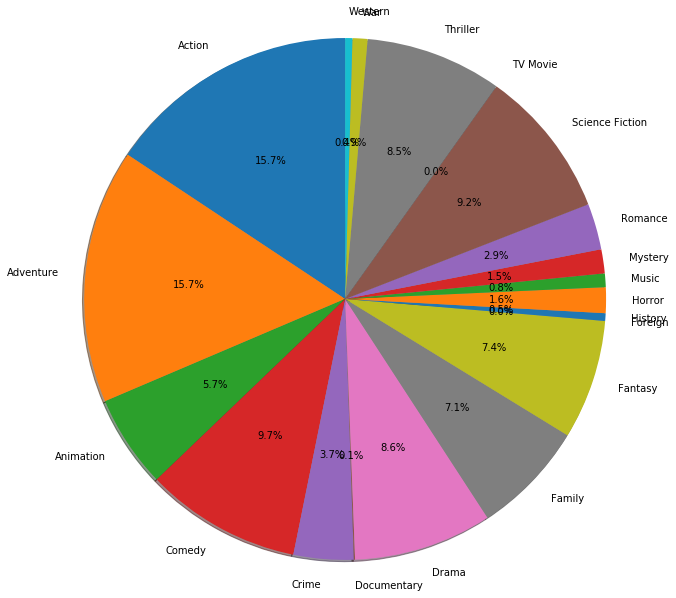

In [15]:
# Group the revenue by genres
rev_genre = rev_5yr.groupby(['genres'], sort = True)['revenue_adj'].sum()

# Make a pie chart for analysis
plt.pie(rev_genre, labels=rev_genre.index, autopct='%1.1f%%', shadow=True, startangle=90, radius=3)

### Does higher budget make higher revenue between 2012 and 2015?

The correlation between budget and revenue is positive, meaning the movie of higher budget rakes in higher revenue.

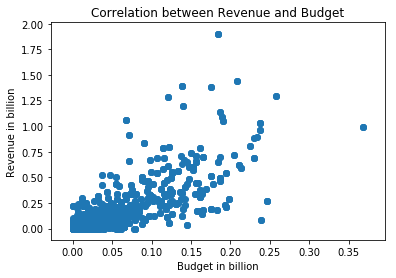

In [16]:
# Make the values of budget and revenue more readable in the charts.
budget = rev_5yr['budget_adj'] / 1000000000
revenue = rev_5yr['revenue_adj'] / 1000000000

# Make the scatter chart for analysis
plt.scatter(budget,revenue)
plt.title("Correlation between Revenue and Budget")
plt.xlabel("Budget in billion")
plt.ylabel("Revenue in billion")
plt.show()

### Are popular movies also profitable between 2012 and 2015?

This scatter chart displays no strong correlation between popularity and revenue.

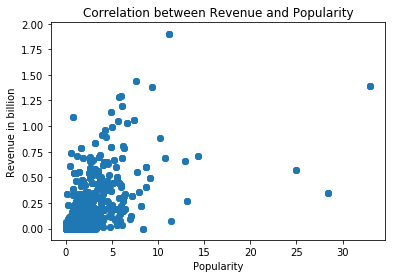

In [17]:
# Make the scatter chart for analysis
plt.scatter(rev_5yr['popularity'],revenue)
plt.title("Correlation between Revenue and Popularity")
plt.xlabel("Popularity")
plt.ylabel("Revenue in billion")
plt.show()

<a id='conclusions'></a>
## Conclusions

The analysis shows positive correlation between budget and revenue, meaning more investment in the movie proudction is more liekly to make profitable movies. Additionally, popular movies tend to be best-selling movies. Finally, action and adveture movies raked in the most revenue among other genres between 2012 and 2015.

There are several limitations in this report. Firstly, each movie is assigned various genres, meaning the analysis of most profitable genres may not be accurate. Perhaps most of the movies would be assigned as action movies. Second, the data is collected until the release year of 2015. Prabably there is change of watching preference. Therefore, the analysis only covers the most recent period in this data, but the colusion might not be able to be applied to 2016 till 2019.  